# Summary statistics about simulated admixed genotypes

In [1]:
using Plots

In [2]:
anc_file = "../out/2_admix_geno/EUR_0.5_AFR_0.5_10_10000/admix.hanc"

"../out/2_admix_geno/EUR_0.5_AFR_0.5_10_10000/admix.hanc"

In [4]:
sim <- list()
par_i <- 2
sim$ancestry <- h5read(dataset_path, paste0('ancestry_', par_i))
sim$haplotype <- h5read(dataset_path, paste0('phgeno_', par_i))
par_snps <-  (ld_blocks[par_i, ]$START <= legend$position) & (legend$position < ld_blocks[par_i, ]$STOP)
par_legend <- legend[par_snps, ]

In [5]:
nrow(par_legend)

[1] 1663

In [6]:
length_bp <- par_legend$position[nrow(par_legend)] - par_legend$position[1]

# Plot ancestry

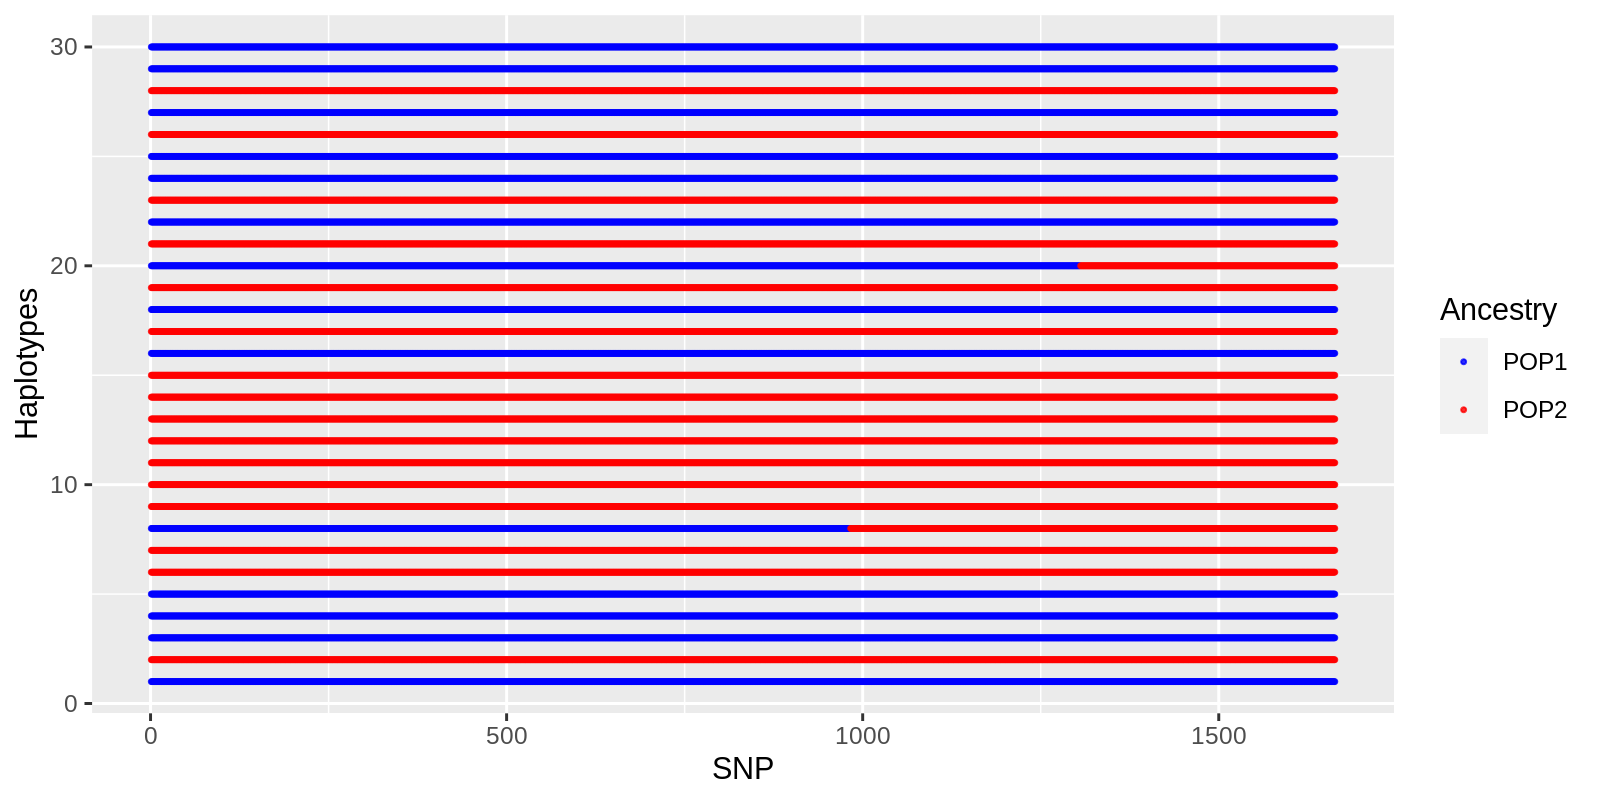

In [7]:
num_haplos <- 30
num_snps <- nrow(sim$ancestry)
df <- tibble(x=rep(1 : num_snps, num_haplos), y=rep(1 : num_haplos, each=num_snps), color = as.vector((sim$ancestry[, 1 : num_haplos])))

options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=200)

ggplot(data=df, aes(x=x, y=y, colour=as.factor(color))) +
  geom_point(size = 0.5, alpha=0.8) + 
  scale_color_manual(values=c('blue', 'red'), labels = c("POP1", "POP2"), name = "Ancestry") +
  labs(x="SNP", y="Haplotypes")

In [8]:
average_num_switch <- sum(sim$ancestry[1 : (nrow(sim$ancestry) - 1), ] != sim$ancestry[2 : nrow(sim$ancestry), ]) / ncol(sim$ancestry)
print(paste0('Average number of switches: ', average_num_switch))
print(paste0('Expected theoretical number of switches: ', length_bp * 9 / 1e8 / 2 ))

[1] "Average number of switches: 0.0248"
[1] "Expected theoretical number of switches: 0.0279576"


In [9]:
admixed_haplos <- sim$haplotype

In [10]:
raw_data_dir <- '/u/project/pasaniuc/pasaniucdata/admixture/genotype_simulation/out/0_raw'

In [11]:
eur_haplos <- read.table(file.path(raw_data_dir, 'chr22.EUR.hap'))[par_snps, ]
rownames(eur_haplos) <- NULL
colnames(eur_haplos) <- NULL

afr_haplos <- read.table(file.path(raw_data_dir, 'chr22.AFR.hap'))[par_snps, ]

rownames(afr_haplos) <- NULL
colnames(afr_haplos) <- NULL

In [12]:
admixed_mean <- rowMeans(admixed_haplos[, 1 : 2000])
admixed_cov <- cov(t(admixed_haplos[, 1 : 2000]))

eur_mean <- rowMeans(eur_haplos)
eur_cov <- cov(t(eur_haplos))

afr_mean <- rowMeans(afr_haplos)
afr_cov <- cov(t(afr_haplos))

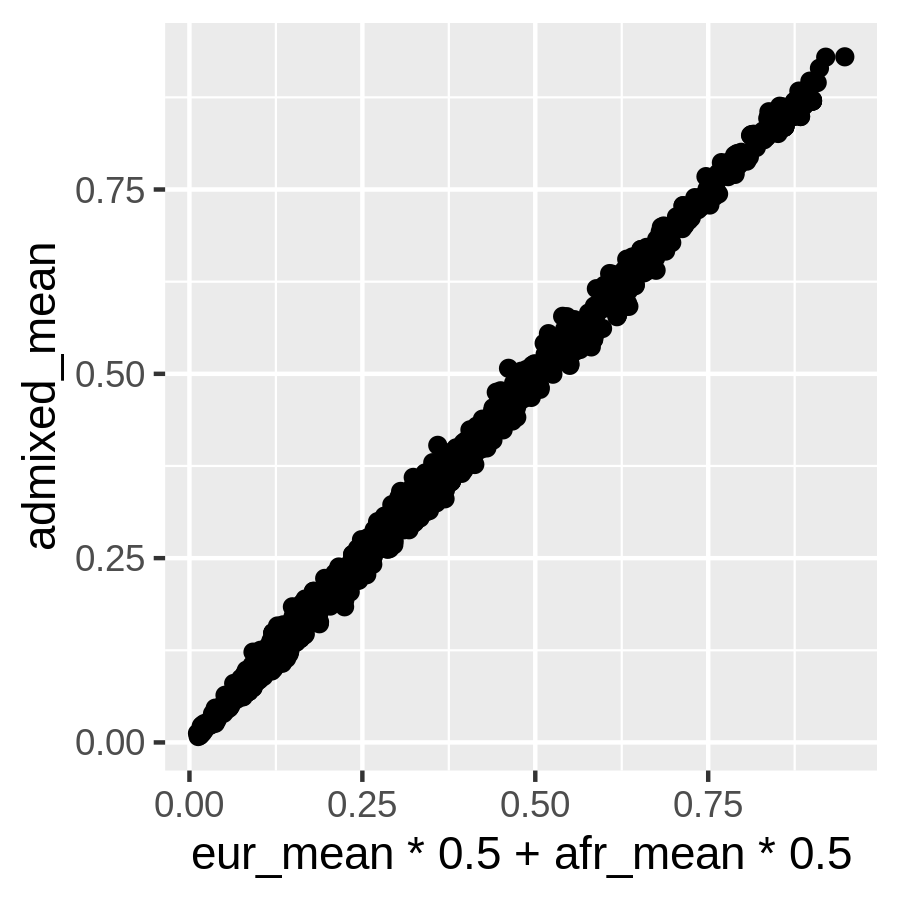

In [13]:
options(repr.plot.width=3, repr.plot.height=3, repr.plot.res=300)
qplot(eur_mean * 0.5 + afr_mean * 0.5, admixed_mean)

In [14]:
plot_ld <- function(ld, limits=c(-1,1)){
    df <- reshape2::melt(ld, c("x", "y"), value.name = "z")

    p <- ggplot(data=df,aes(x=x,y=y,fill=z))+
        geom_tile() + theme_classic() + scale_fill_distiller(palette = "RdBu", limits=limits) + 
        scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0)) + 
        theme(aspect.ratio=1, axis.title.x=element_blank(), axis.title.y=element_blank(), legend.title = element_blank())
    
    return(p)
}

plot_ld_pair <- function(ld1, ld2, limits=c(-1, 1)){
    # Plot a pair of LD
    df1 <- reshape2::melt(ld1, c("x", "y"), value.name = "z") %>% filter(x > y)
    df2 <- reshape2::melt(ld2, c("x", "y"), value.name = "z") %>% filter(x < y)
    df <- rbind(df1, df2)
    p <- ggplot(data=df,aes(x=x,y=y,fill=z))+
        geom_tile() + theme_classic() + scale_fill_distiller(palette = "RdBu", limits=limits) + 
        scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0)) + 
        theme(aspect.ratio=1, axis.title.x=element_blank(), axis.title.y=element_blank(), legend.title = element_blank())
    return(p)
}

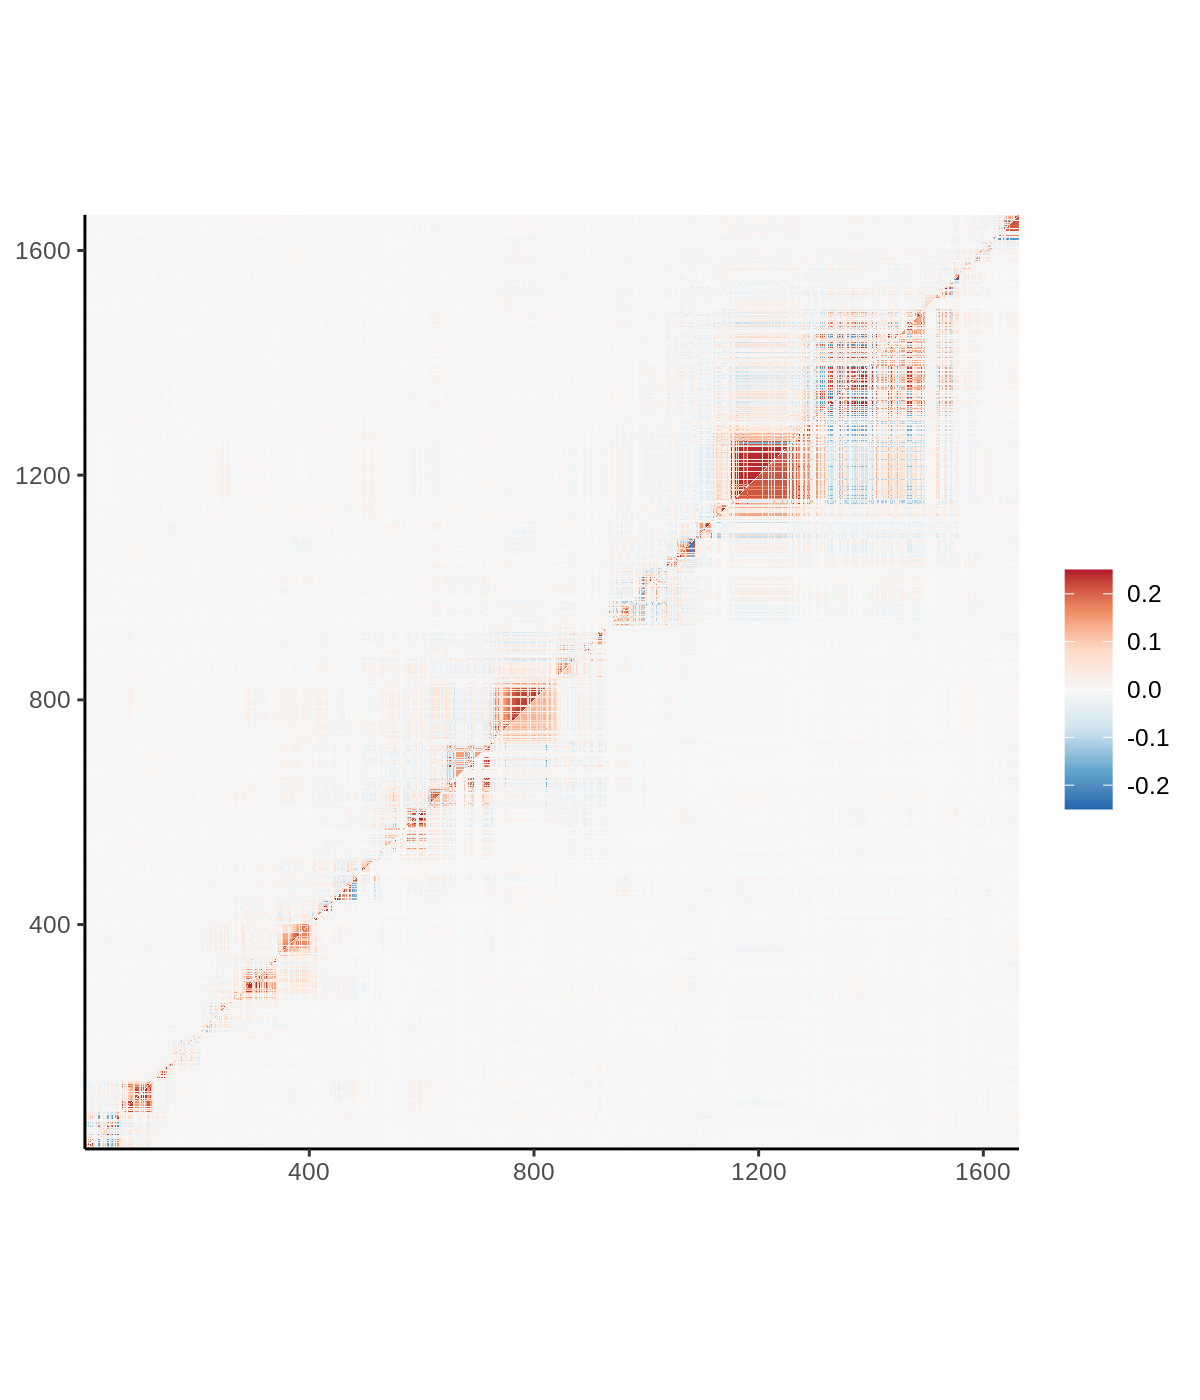

In [18]:
options(repr.plot.width=6, repr.plot.height=7, repr.plot.res=200)
plot_ld_pair(eur_cov, afr_cov, limits=c(-0.25, 0.25)) + labs(x='EUR', y='AFR')

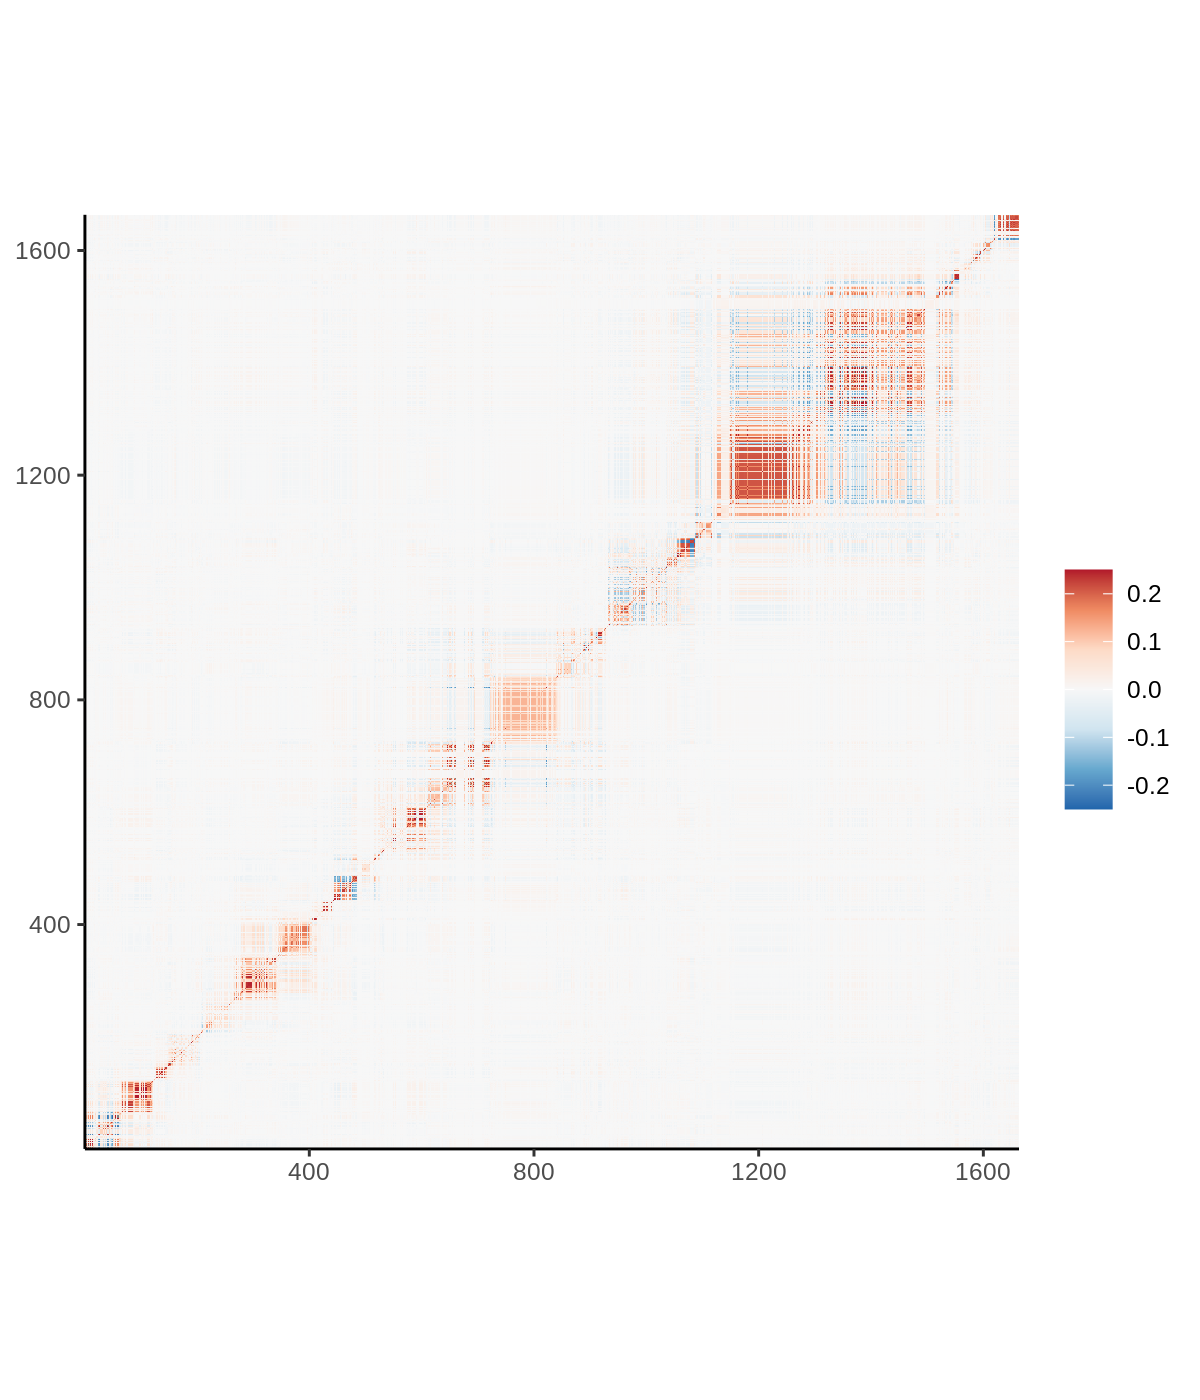

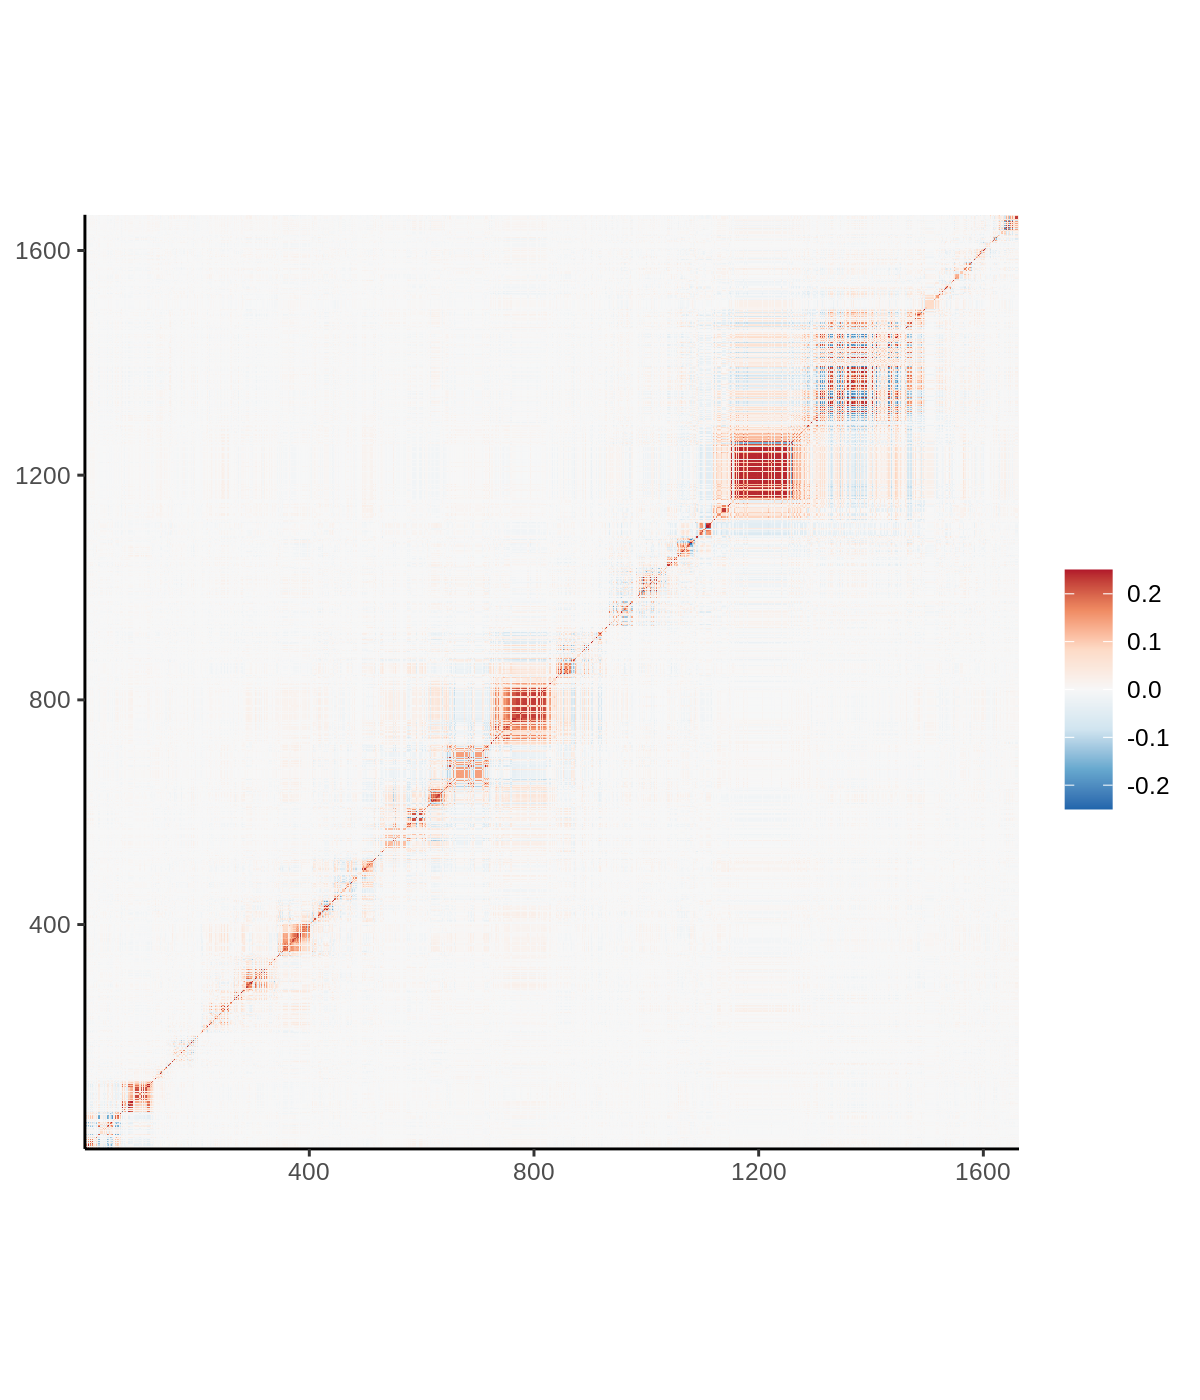

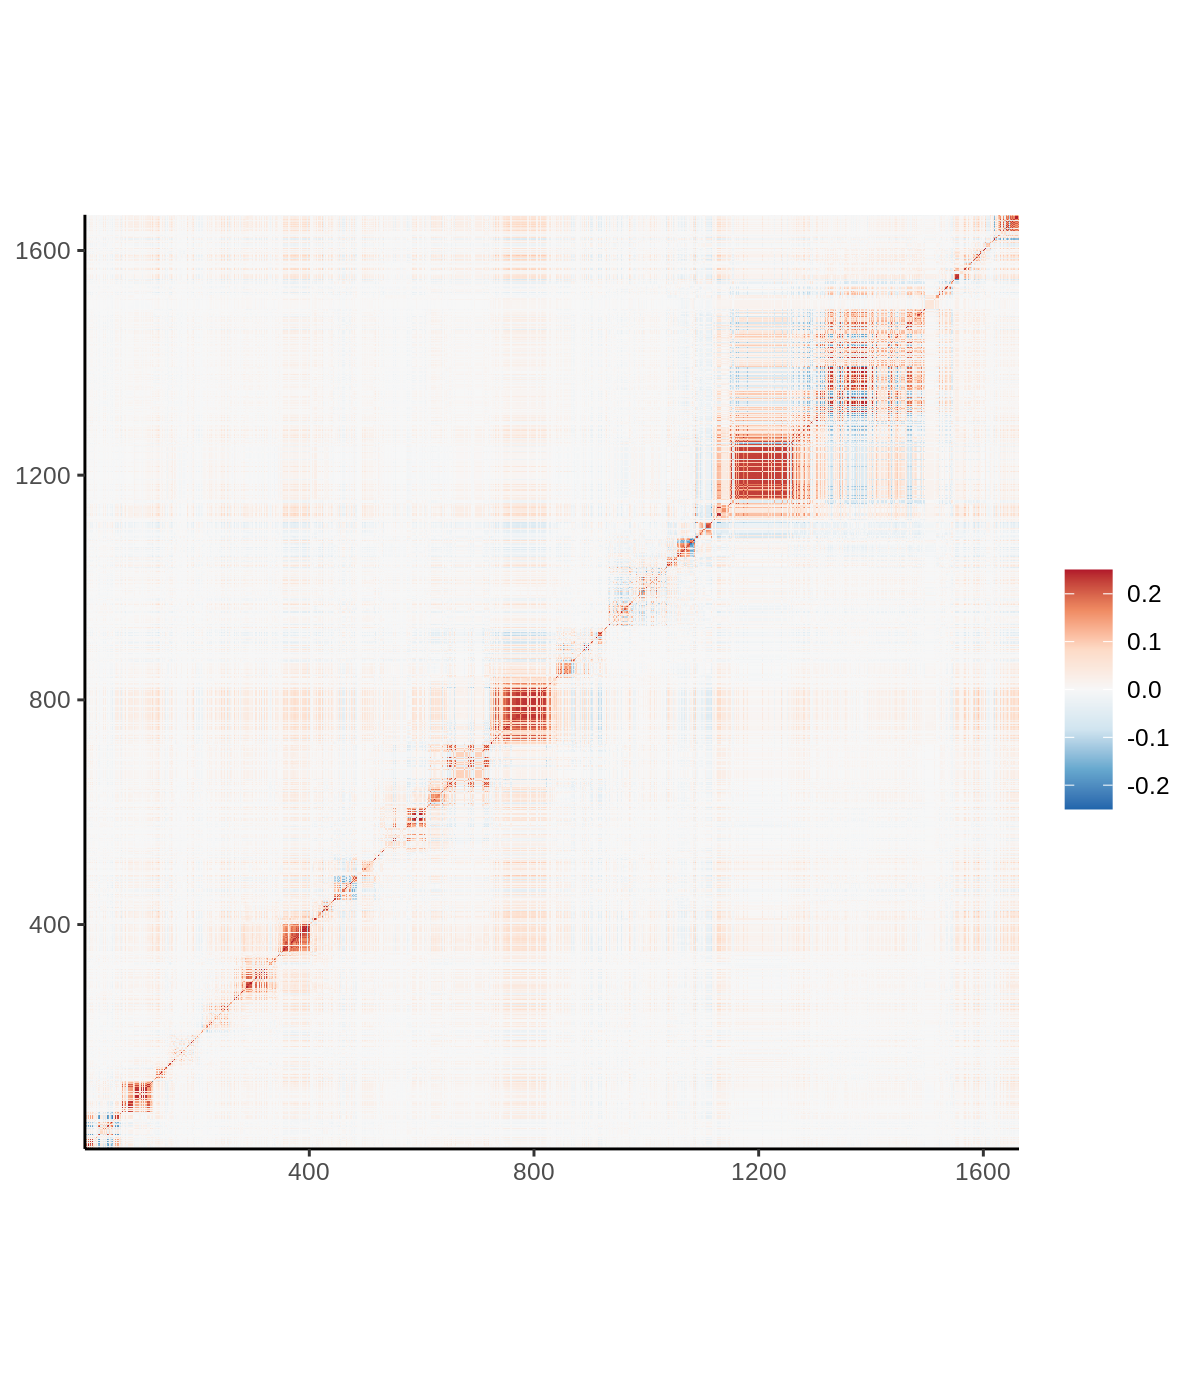

In [16]:

plot_ld(eur_cov, limits=c(-0.25, 0.25))
plot_ld(afr_cov, limits=c(-0.25, 0.25))
plot_ld(admixed_cov, limits=c(-0.25, 0.25))

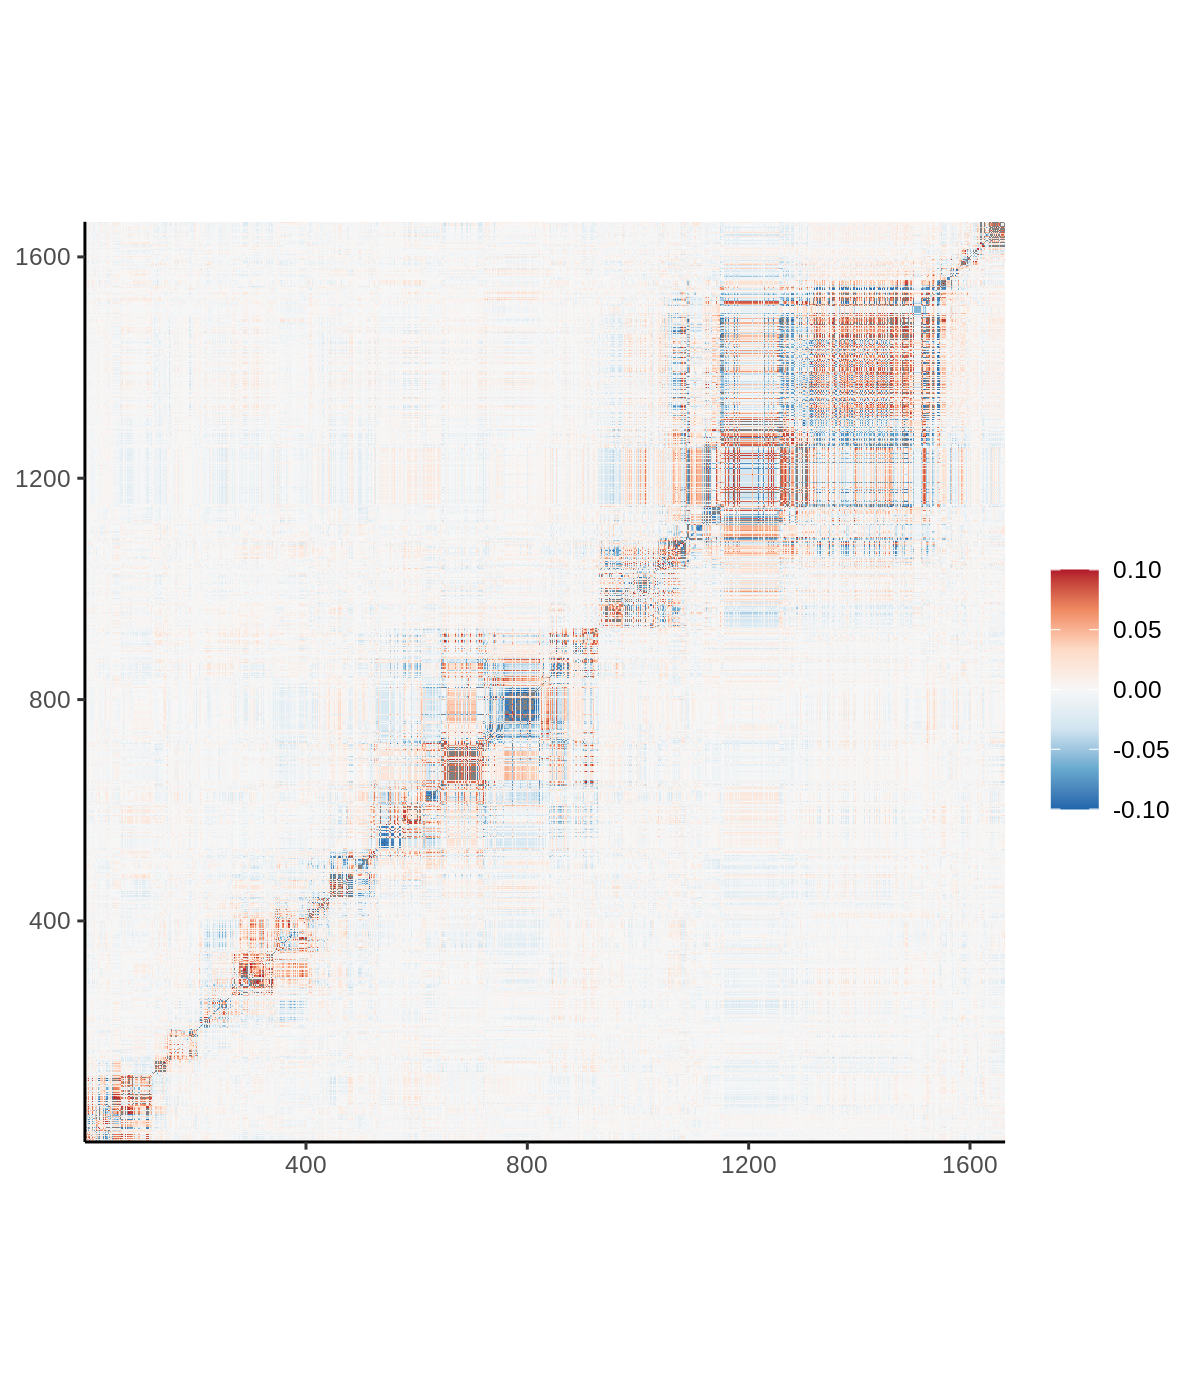

In [17]:
plot_ld(eur_cov - afr_cov, limits=c(-0.1, 0.1))